In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None
%matplotlib inline

## Import and Cleaning the Dataset

In [2]:
dir = "/Users/Collier/Dropbox/Skills/Python/Projects/Culture/Cities_Bars_Yelp/"
bar_data = pd.read_csv(dir + "yelp_data_bars.csv", encoding = "ISO-8859-1")

In [3]:
len(bar_data)

1055

In [4]:
bar_data = bar_data[~bar_data['Address'].isnull()]

### Parse City Name from Address

We will create a function to parse out city names from bar addresses.

In [5]:
def city_finder(search_string):
    if "Austin," in search_string: return "Austin"
    elif "Louisville," in search_string: return "Louisville"
    elif "Baltimore," in search_string: return "Baltimore"
    elif "Memphis," in search_string: return "Memphis"
    elif "Oklahoma City," in search_string: return "Oklahoma City"
    elif "Las Vegas," in search_string: return "Las Vegas"
    elif "El Paso," in search_string: return "El Paso"
    elif "Detroit," in search_string: return "Detroit"
    elif "Nashville," in search_string: return "Nashville"
    elif "Indianapolis," in search_string: return "Indianapolis"
    elif "Fort Worth," in search_string: return "Fort Worth"
    elif "Charlotte," in search_string: return "Charlotte"
    elif "Dallas," in search_string: return "Dallas"
    elif "San Jose," in search_string: return "San Jose"
    elif "Jacksonville," in search_string: return "Jacksonville"
    elif "Columbus," in search_string: return "Columbus" 
    elif "Phoenix," in search_string: return "Phoenix"
    elif "Philadelphia," in search_string: return "Philadelphia"
    elif "San Antonio," in search_string: return "San Antonio"
    elif "San Diego," in search_string: return "San Diego"
    elif "Houston," in search_string: return "Houston"
    elif "San Francisco," in search_string: return "San Francisco"
    elif "Los Angeles," in search_string: return "Los Angeles"
    elif "Seattle," in search_string: return "Seattle"
    elif "Portland," in search_string: return "Portland"
    elif "Washington," in search_string: return "Washington, DC"
    elif "Chicago," in search_string: return "Chicago"
    elif "Denver," in search_string: return "Denver"
    elif "Boston," in search_string: return "Boston"
    elif "New York," in search_string: return "New York"

In [6]:
bar_data['City'] = bar_data['Address'].apply(city_finder)

Lets see how many bars we have for each city

In [7]:
bar_data.groupby('City').size()

City
Austin            40
Boston            40
Charlotte         38
Chicago           39
Columbus          40
Dallas            40
Denver            40
Detroit           37
El Paso           40
Fort Worth        40
Houston           40
Indianapolis      40
Jacksonville      39
Las Vegas         4 
Los Angeles       39
Memphis           40
Nashville         40
New York          35
Oklahoma City     10
Philadelphia      40
Phoenix           40
Portland          39
San Antonio       40
San Diego         40
San Francisco     40
San Jose          40
Seattle           33
Washington, DC    40
dtype: int64

We can see that two of the cities have under 10 bars in our dataset, this is most likely due to scraping issues from Yelp.com.

Let's remove those two because we don't have a large enough sample:

In [8]:
bar_data = bar_data[~bar_data['City'].isin(["Las Vegas","Oklahoma City",None])]

In [9]:
bar_data2 = bar_data[["Ambience","Alcohol","Best Nights","Bike Parking","Good For Dancing","Good for Groups","Happy Hour", 
                      "Has Pool Table","Music","Noise Level","Outdoor Seating","Parking","Price_Level",
                     "Price_Range","Smoking","Takes Reservations","Waiter_Service","Wi-Fi","City"]]

In [10]:
len(bar_data2)

1019

### Transform Categorical Variables

Now we must transform our dataframe to reflect the categorical variables in most of the columns.  We will create proportions of each of these variables by city and create separate dataframes for each variable.  These will be merged together later on 'City' to complete our dataset.

We will do this while simeltaneously plotting the data for exploration

## Exploratory Data Analysis

### Bars with Bike Parking

In [11]:
bar_bikes = pd.get_dummies(bar_data2['Bike Parking'],prefix="Bike Parking")
bar_bikes['City'] = bar_data2['City']
del bar_bikes['Bike Parking_No']
# bar_bikes.head()

In [12]:
bar_bikes_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Bike Parking'] == \
                        'Yes'].count()/x.count())['Bike Parking'])

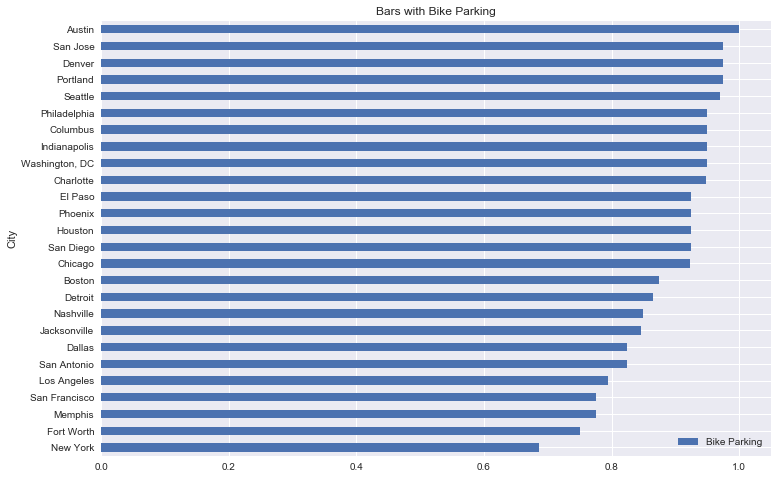

In [13]:
bar_bikes_grp.sort_values("Bike Parking").plot.barh(y='Bike Parking',\
                       figsize=(12,8),title="Bars with Bike Parking")

### Bars that are Good for Dancing

In [14]:
bar_dancing = pd.get_dummies(bar_data2['Good For Dancing'],prefix="Good For Dancing")
bar_dancing['City'] = bar_data2['City']
del bar_dancing['Good For Dancing_No']
# bar_dancing.head()

In [15]:
bar_dancing_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Good For Dancing'] == \
                        'Yes'].count()/x.count())['Good For Dancing'])

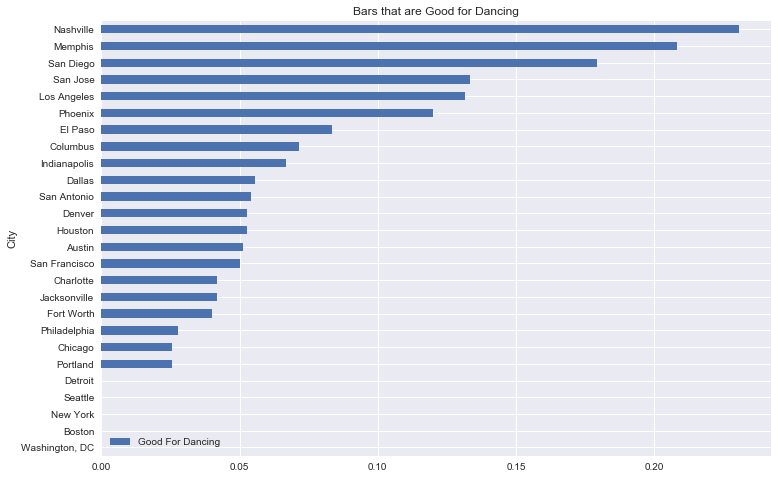

In [16]:
bar_dancing_grp.sort_values("Good For Dancing").plot.barh(y='Good For Dancing',\
                       figsize=(12,8),title="Bars that are Good for Dancing")

### Bars that are Good for Groups

In [17]:
bar_groups = pd.get_dummies(bar_data2['Good for Groups'],prefix="Good for Groups")
bar_groups['City'] = bar_data2['City']
del bar_groups['Good for Groups_No']
# bar_groups.head()

In [18]:
bar_groups_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Good for Groups'] == \
                        'Yes'].count()/x.count())['Good for Groups'])

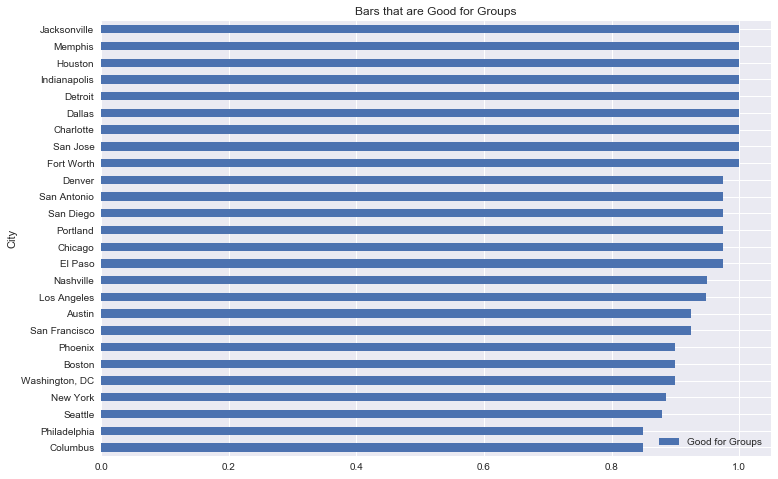

In [19]:
bar_groups_grp.sort_values("Good for Groups").plot.barh(y='Good for Groups',\
                       figsize=(12,8),title="Bars that are Good for Groups")

### Bars with Happy Hour

In [20]:
bar_hh = pd.get_dummies(bar_data2['Happy Hour'],prefix="Happy Hour")
bar_hh['City'] = bar_data2['City']
del bar_hh['Happy Hour_No']
# bar_hh.head()

In [21]:
bar_hh_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Happy Hour'] == \
                        'Yes'].count()/x.count())['Happy Hour'])

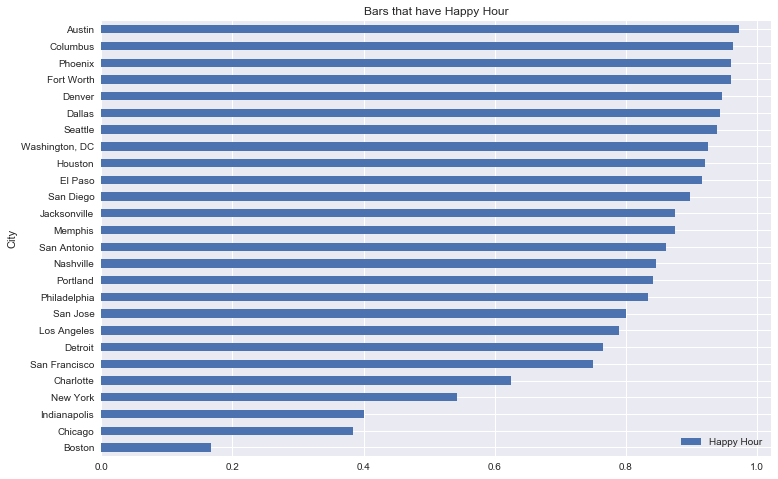

In [22]:
bar_hh_grp.sort_values("Happy Hour").plot.barh(y='Happy Hour',\
                       figsize=(12,8),title="Bars that have Happy Hour")

### Bars with Pool Tables

Memphis, by far and away has the highest proportion of bars with pool tables.  

In [23]:
bar_pooltable = pd.get_dummies(bar_data2['Has Pool Table'],prefix="Pool Table")
bar_pooltable['City'] = bar_data2['City']
del bar_pooltable['Pool Table_No']

In [24]:
bar_pooltable_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Has Pool Table'] == \
                        'Yes'].count()/x.count())['Has Pool Table'])

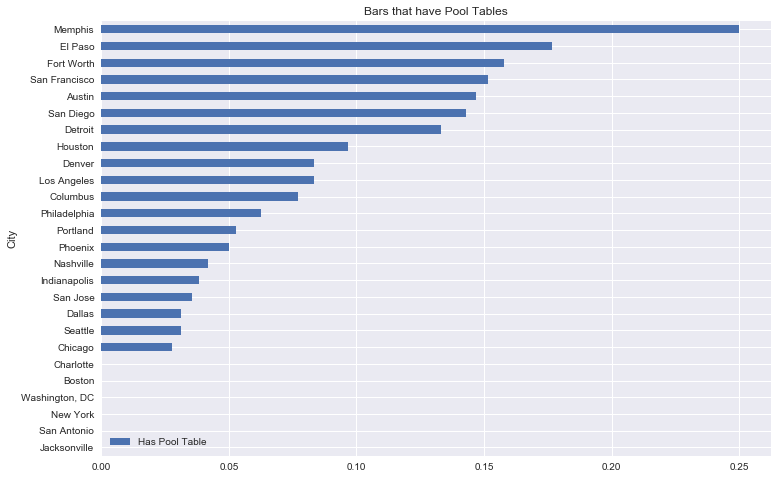

In [25]:
bar_pooltable_grp.sort_values("Has Pool Table").plot.barh(y='Has Pool Table',\
                       figsize=(12,8),title="Bars that have Pool Tables")

### Bars with Outdoor Seating

Bars in the south and west have the highest proportions of outdoor seating available.

In [26]:
bar_outdoor = pd.get_dummies(bar_data2['Outdoor Seating'],prefix="Outdoor Seating")
bar_outdoor['City'] = bar_data2['City']
del bar_outdoor['Outdoor Seating_No']

In [27]:
bar_outdoor_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Outdoor Seating'] == \
                        'Yes'].count()/x.count())['Outdoor Seating'])

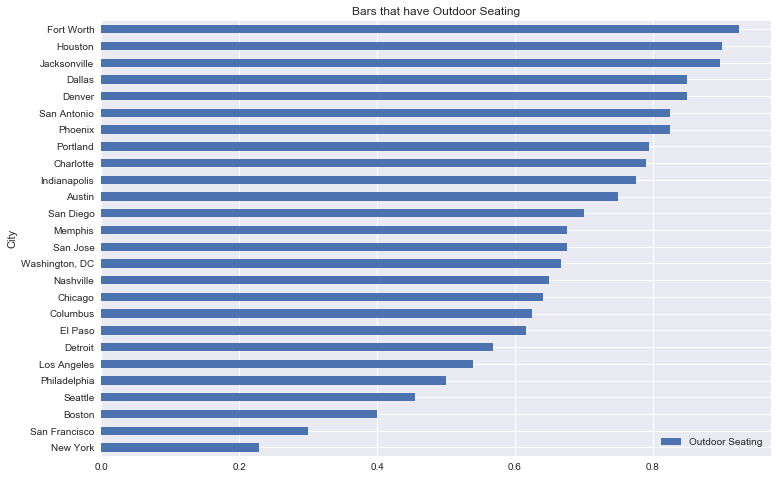

In [28]:
bar_outdoor_grp.sort_values("Outdoor Seating").plot.barh(y='Outdoor Seating',\
                       figsize=(12,8),title="Bars that have Outdoor Seating")

### Bars that Take Reservations

In [29]:
bar_reservations = pd.get_dummies(bar_data2['Takes Reservations'],prefix="Takes Reservations")
bar_reservations['City'] = bar_data2['City']
del bar_reservations['Takes Reservations_No']

In [30]:
bar_reservations_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Takes Reservations'] == \
                        'Yes'].count()/x.count())['Takes Reservations'])

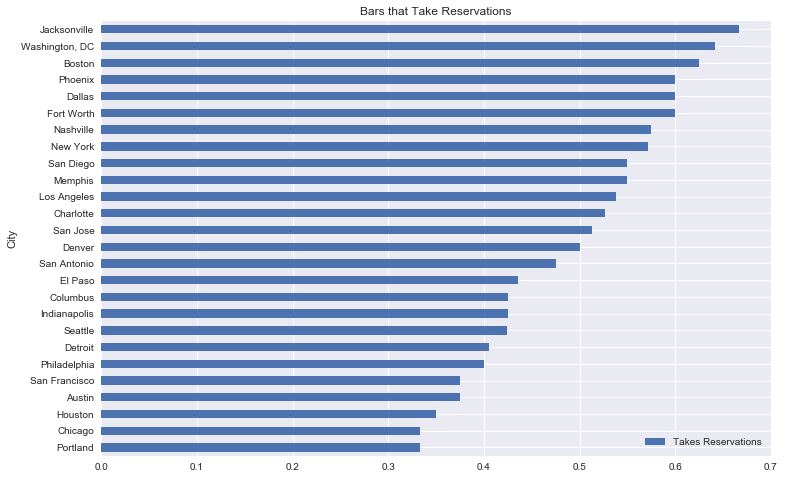

In [31]:
bar_reservations_grp.sort_values("Takes Reservations").plot.barh(y='Takes Reservations',\
                       figsize=(12,8),title="Bars that Take Reservations")

### Bars with Waiter Service

In [32]:
bar_waiters = bar_data2[['City','Waiter_Service']]

In [33]:
bar_waiters_grp = pd.DataFrame(bar_data2.groupby("City").apply(lambda x: x[x['Waiter_Service'] == \
                        'Yes'].count()/x.count())['Waiter_Service'])

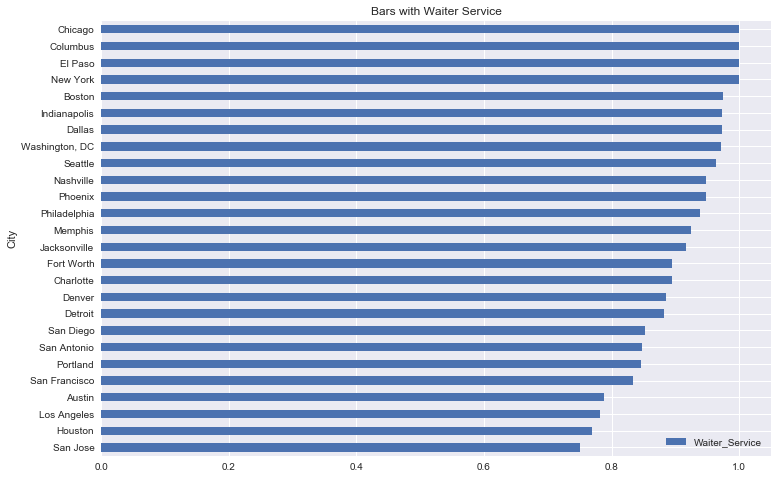

In [34]:
bar_waiters_grp.sort_values("Waiter_Service").plot.barh(y='Waiter_Service',\
                       figsize=(12,8),title="Bars with Waiter Service")

### Best Nights

In [35]:
bar_data2['Mon_Night'] = np.where(bar_data2['Best Nights'].str.contains("Mon", na=False),1,0)
bar_data2['Tue_Night'] = np.where(bar_data2['Best Nights'].str.contains("Tue", na=False),1,0)
bar_data2['Wed_Night'] = np.where(bar_data2['Best Nights'].str.contains("Wed", na=False),1,0)
bar_data2['Thu_Night'] = np.where(bar_data2['Best Nights'].str.contains("Thu", na=False),1,0)
bar_data2['Fri_Night'] = np.where(bar_data2['Best Nights'].str.contains("Fri", na=False),1,0)
bar_data2['Sat_Night'] = np.where(bar_data2['Best Nights'].str.contains("Sat", na=False),1,0)
bar_data2['Sun_Night'] = np.where(bar_data2['Best Nights'].str.contains("Sun", na=False),1,0)

In [36]:
bar_data_nights = bar_data2[['City','Mon_Night','Tue_Night','Wed_Night',
                            'Thu_Night','Fri_Night','Sat_Night','Sun_Night']]

In [37]:
bar_data_nights_grp = pd.melt(bar_data_nights, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_nights_grp = bar_data_nights_grp.pivot_table(values='value', 
                                              index='City', columns='variable', aggfunc='sum')


In [38]:
columns = ['Mon_Night','Tue_Night','Wed_Night','Thu_Night','Fri_Night','Sat_Night','Sun_Night']
bar_data_nights_grp = bar_data_nights_grp[columns]

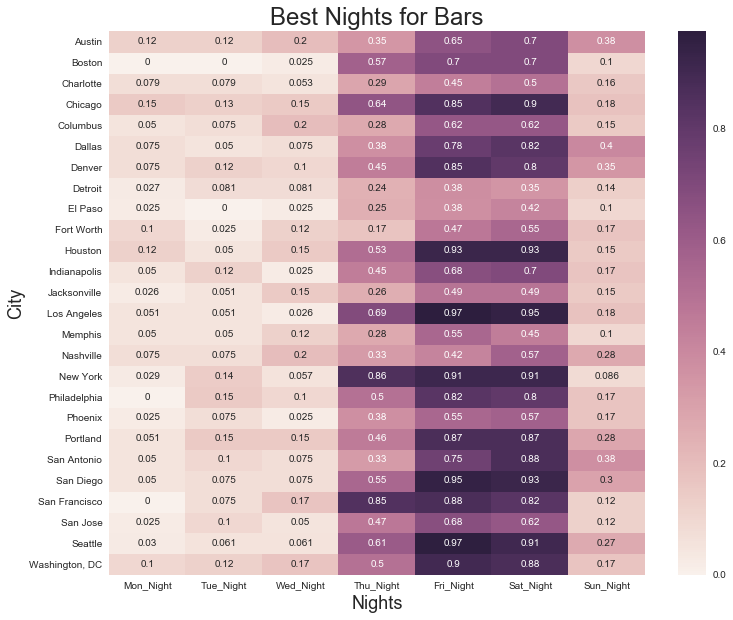

In [39]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_nights_grp,annot=True)
sns.plt.title('Best Nights for Bars', fontsize=24)
plt.xlabel('Nights', fontsize=18)
plt.ylabel('City', fontsize=18)

### Ambiance

In [40]:
bar_data2['Amb_Casual'] = np.where(bar_data2['Ambience'].str.contains("Casual", na=False),1,0)
bar_data2['Amb_Classy'] = np.where(bar_data2['Ambience'].str.contains("Classy", na=False),1,0)
bar_data2['Amb_Romantic'] = np.where(bar_data2['Ambience'].str.contains("Romantic", na=False),1,0)
bar_data2['Amb_Trendy'] = np.where(bar_data2['Ambience'].str.contains("Trendy", na=False),1,0)
bar_data2['Amb_Divey'] = np.where(bar_data2['Ambience'].str.contains("Divey", na=False),1,0)
bar_data2['Amb_Hipster'] = np.where(bar_data2['Ambience'].str.contains("Hipster", na=False),1,0)
bar_data2['Amb_Upscale'] = np.where(bar_data2['Ambience'].str.contains("Upscale", na=False),1,0)
bar_data2['Amb_Intimate'] = np.where(bar_data2['Ambience'].str.contains("Intimate", na=False),1,0)

In [41]:
bar_data_ambience = bar_data2[['City','Amb_Casual','Amb_Classy','Amb_Romantic','Amb_Trendy',
                            'Amb_Divey','Amb_Hipster','Amb_Upscale','Amb_Intimate']]

In [42]:
bar_data_ambience_grp = pd.melt(bar_data_ambience, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_ambience_grp = bar_data_ambience_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

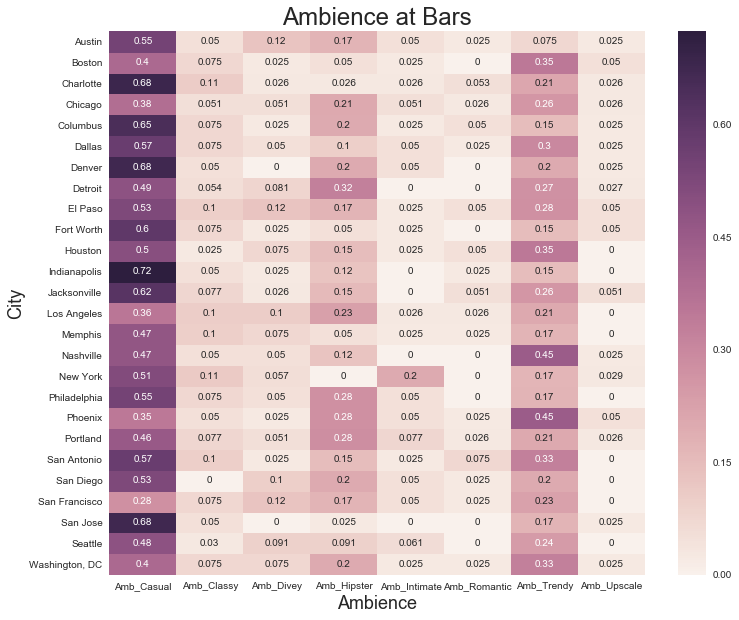

In [43]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_ambience_grp,annot=True)
sns.plt.title('Ambience at Bars', fontsize=24)
plt.xlabel('Ambience', fontsize=18)
plt.ylabel('City', fontsize=18)

### Parking

In [44]:
bar_data2['Parking_Valet'] = np.where(bar_data2['Parking'].str.contains("Valet", na=False),1,0)
bar_data2['Parking_Street'] = np.where(bar_data2['Parking'].str.contains("Street", na=False),1,0)
bar_data2['Parking_Private Lot'] = np.where(bar_data2['Parking'].str.contains("Private Lot", na=False),1,0)
bar_data2['Parking_Validated'] = np.where(bar_data2['Parking'].str.contains("Validated", na=False),1,0)
bar_data2['Parking_Garage'] = np.where(bar_data2['Parking'].str.contains("Garage", na=False),1,0)

In [45]:
bar_data_parking = bar_data2[['City','Parking_Valet','Parking_Street','Parking_Private Lot','Parking_Validated',
                            'Parking_Garage']]

In [46]:
bar_data_parking_grp = pd.melt(bar_data_parking, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_parking_grp = bar_data_parking_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

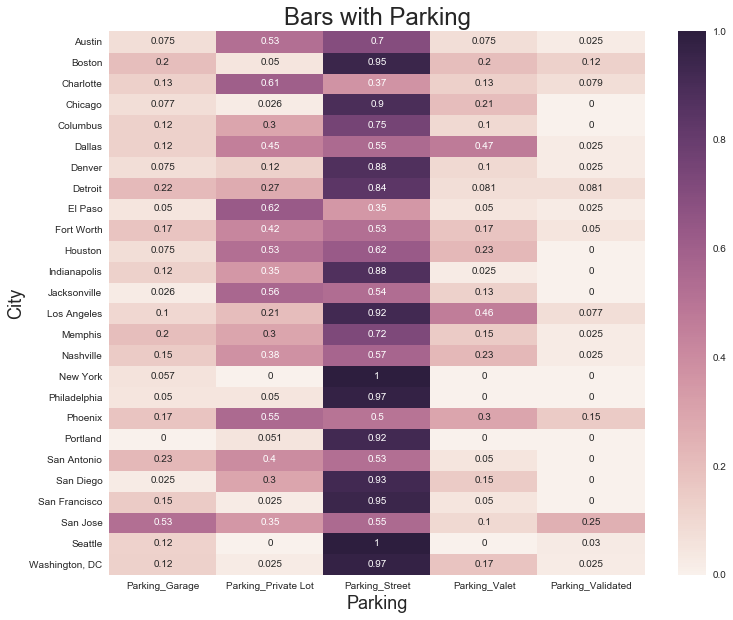

In [47]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_parking_grp,annot=True)
sns.plt.title('Bars with Parking', fontsize=24)
plt.xlabel('Parking', fontsize=18)
plt.ylabel('City', fontsize=18)

### Music at Bars

In [48]:
bar_data2['Music_Background'] = np.where(bar_data2['Music'].str.contains("Background", na=False),1,0)
bar_data2['Music_Live'] = np.where(bar_data2['Music'].str.contains("Live", na=False),1,0)
bar_data2['Music_Juke Box'] = np.where(bar_data2['Music'].str.contains("Juke Box", na=False),1,0)
bar_data2['Music_DJ'] = np.where(bar_data2['Music'].str.contains("DJ", na=False),1,0)
bar_data2['Music_Music Videos'] = np.where(bar_data2['Music'].str.contains("Music Videos", na=False),1,0)
bar_data2['Music_Karaoke'] = np.where(bar_data2['Music'].str.contains("Karaoke", na=False),1,0)

In [49]:
bar_data_music = bar_data2[['City','Music_Background','Music_Live','Music_Juke Box','Music_DJ',
                            'Music_Music Videos','Music_Karaoke']]

In [50]:
bar_data_music_grp = pd.melt(bar_data_music, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_music_grp = bar_data_music_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

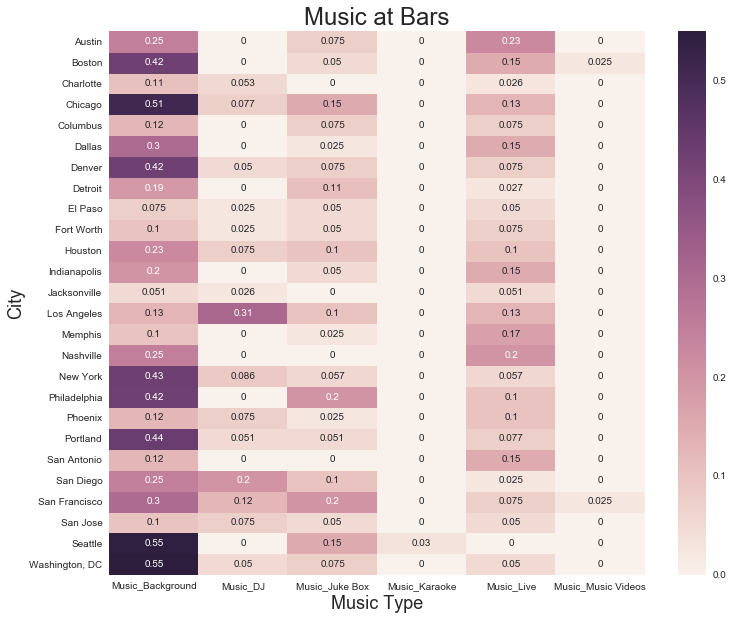

In [51]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_music_grp,annot=True)
sns.plt.title('Music at Bars', fontsize=24)
plt.xlabel('Music Type', fontsize=18)
plt.ylabel('City', fontsize=18)

### Alcohol at Bars

In [52]:
bar_data_alcohol = pd.get_dummies(bar_data2['Alcohol'],prefix='Alcohol')
bar_data_alcohol['City'] = bar_data2['City']
bar_data_alcohol_grp = pd.melt(bar_data_alcohol, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_alcohol_grp = bar_data_alcohol_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

In [53]:
columns = ["Alcohol_No","Alcohol_Beer & Wine Only","Alcohol_Full Bar"]
bar_data_alcohol_grp = bar_data_alcohol_grp[columns]

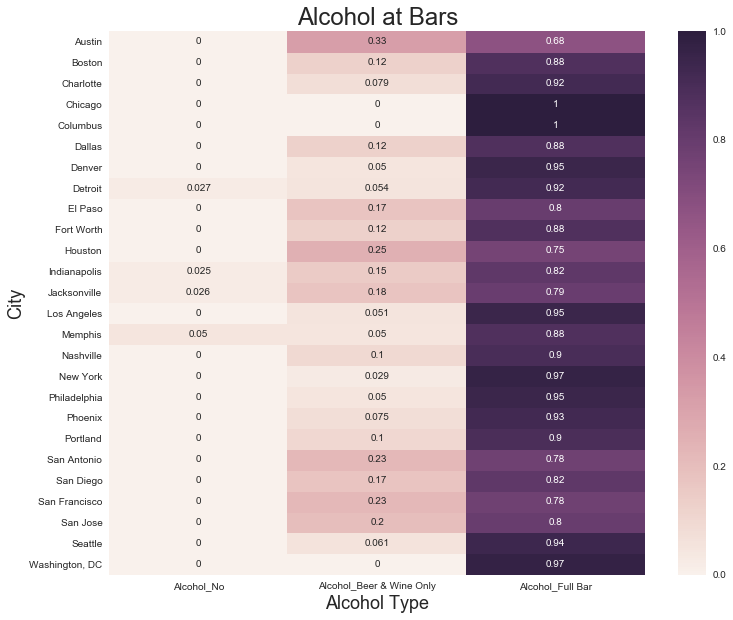

In [54]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_alcohol_grp,annot=True)
sns.plt.title('Alcohol at Bars', fontsize=24)
plt.xlabel('Alcohol Type', fontsize=18)
plt.ylabel('City', fontsize=18)

### Noise Level at Bars

In [55]:
bar_data_noise = pd.get_dummies(bar_data2['Noise Level'],prefix='Noise Level')
bar_data_noise['City'] = bar_data2['City']
bar_data_noise_grp = pd.melt(bar_data_noise, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_noise_grp = bar_data_noise_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

In [56]:
columns = ["Noise Level_Quiet","Noise Level_Average","Noise Level_Loud","Noise Level_Very Loud"]
bar_data_noise_grp = bar_data_noise_grp[columns]

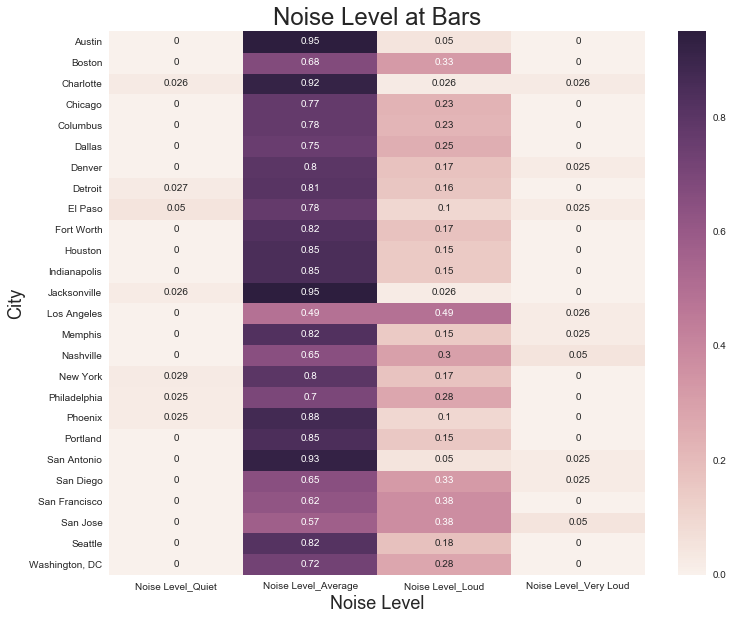

In [57]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_noise_grp,annot=True)
sns.plt.title('Noise Level at Bars', fontsize=24)
plt.xlabel('Noise Level', fontsize=18)
plt.ylabel('City', fontsize=18)

### Wi-Fi at Bars

In [58]:
bar_data_wifi = pd.get_dummies(bar_data2['Wi-Fi'],prefix='Wi-Fi')
bar_data_wifi['City'] = bar_data2['City']
bar_data_wifi_grp = pd.melt(bar_data_wifi, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_wifi_grp = bar_data_wifi_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

In [59]:
columns = ["Wi-Fi_No","Wi-Fi_Free","Wi-Fi_Paid"]
bar_data_wifi_grp = bar_data_wifi_grp[columns]

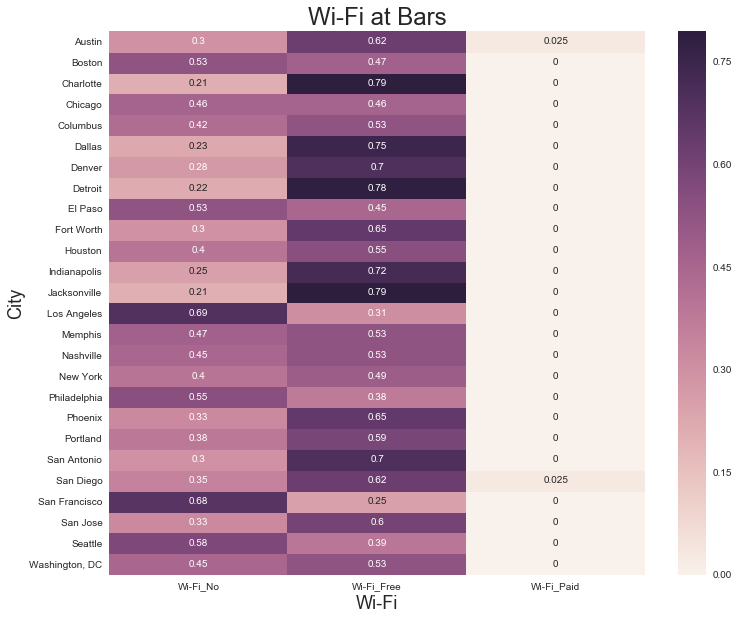

In [60]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_wifi_grp,annot=True)
sns.plt.title('Wi-Fi at Bars', fontsize=24)
plt.xlabel('Wi-Fi', fontsize=18)
plt.ylabel('City', fontsize=18)

### Smoking

We can see that there are only a few

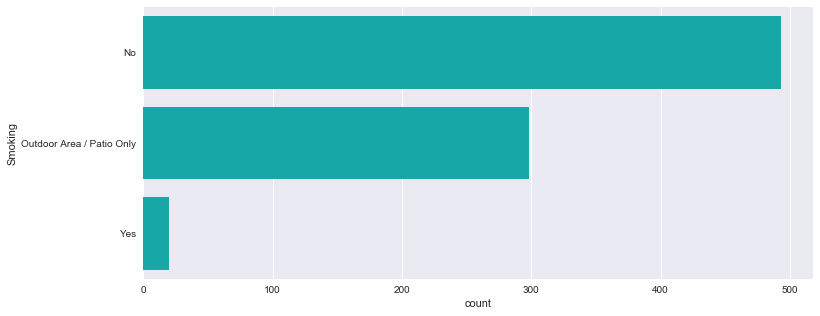

In [224]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y="Smoking", data=bar_data2, color="c");

In [61]:
bar_data_smoking = pd.get_dummies(bar_data2['Smoking'],prefix='Smoking')
bar_data_smoking['City'] = bar_data2['City']
bar_data_smoking_grp = pd.melt(bar_data_smoking, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_smoking_grp = bar_data_smoking_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')


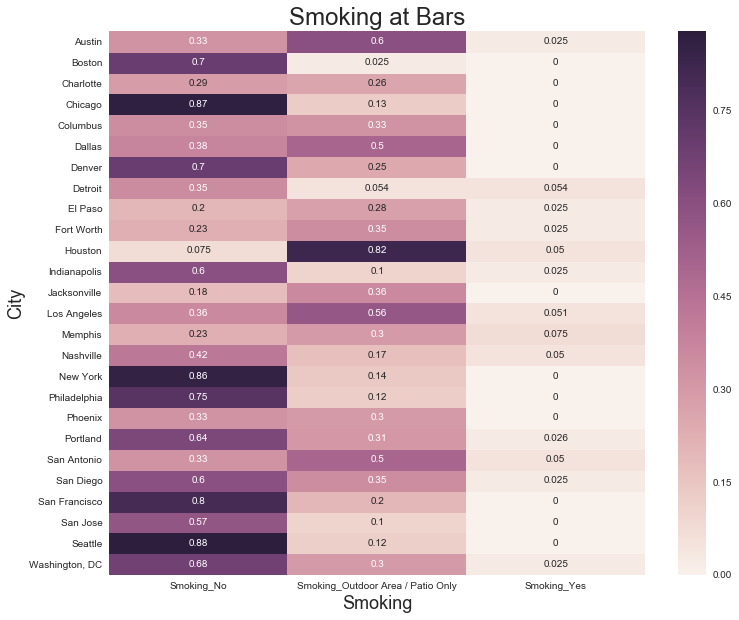

In [62]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_smoking_grp,annot=True)
sns.plt.title('Smoking at Bars', fontsize=24)
plt.xlabel('Smoking', fontsize=18)
plt.ylabel('City', fontsize=18)

### Pricing at Bars

In [63]:
def switcher(val):
    if val == "$": return "Low"
    elif val == "$$": return "Moderate"
    elif val == "$$$": return "Expensive"
    elif val == "$$$$": return "Luxurious"

In [64]:
bar_data2['Pricing'] = bar_data2['Price_Level'].apply(switcher)

In [65]:
bar_data_pricing = pd.get_dummies(bar_data2['Pricing'],prefix='Pricing')
bar_data_pricing['City'] = bar_data2['City']
bar_data_pricing_grp = pd.melt(bar_data_pricing, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_pricing_grp = bar_data_pricing_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')

In [66]:
columns = ["Pricing_Low","Pricing_Moderate","Pricing_Expensive","Pricing_Luxurious"]
bar_data_pricing_grp = bar_data_pricing_grp[columns]

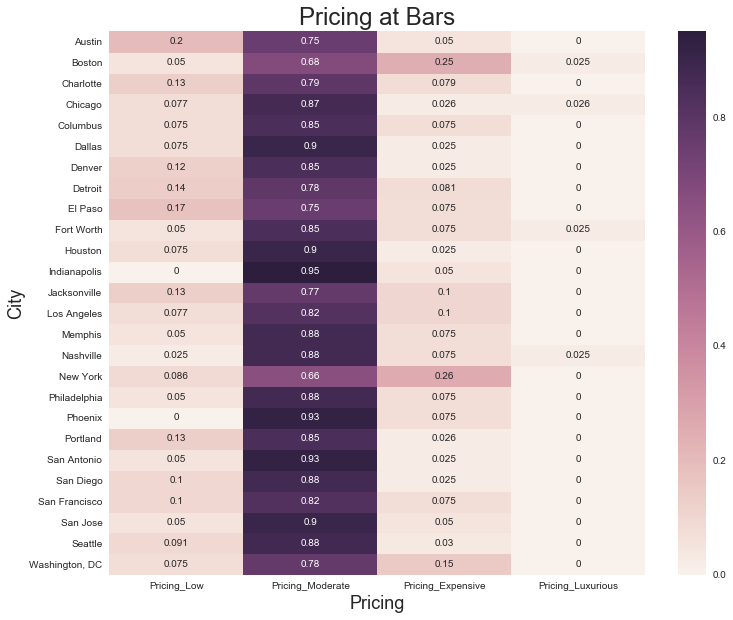

In [67]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(bar_data_pricing_grp,annot=True)
sns.plt.title('Pricing at Bars', fontsize=24)
plt.xlabel('Pricing', fontsize=18)
plt.ylabel('City', fontsize=18)

## Feature Selection & Dimensionality Reduction

### Grouped Features

In [210]:
#Combine raw data-frames
dfs_all = [bar_bikes_grp,bar_dancing_grp,bar_data_alcohol_grp,bar_data_ambience_grp,bar_data_music_grp,
           bar_data_nights_grp,bar_data_noise_grp,bar_data_parking_grp,bar_data_pricing_grp,
           bar_data_smoking_grp,bar_data_wifi_grp,bar_groups_grp,bar_hh_grp]

In [211]:
cols, rows = [], []
for df_i in dfs_all:
    cols = cols + df_i.columns.tolist()
    rows = rows + df_i.index.tolist()
cols = np.unique(cols)
rows = np.unique(rows)       
df_grp = pd.DataFrame(data=np.NaN, columns=cols, index=rows) 

# fill DataFrame
for df_i in dfs_all:
    df_grp.loc[df_i.index, df_i.columns] = df_i.values

In [212]:
df.shape

(26, 47)

In [213]:
df.head()

,Alcohol_Beer & Wine Only,Alcohol_Full Bar,Alcohol_No,Amb_Casual,Amb_Classy,Amb_Divey,Amb_Hipster,Amb_Intimate,Amb_Romantic,Amb_Trendy,Amb_Upscale,Bike Parking,Fri_Night,Good For Dancing,Good for Groups,Happy Hour,Mon_Night,Music_Background,Music_DJ,Music_Juke Box,Music_Karaoke,Music_Live,Music_Music Videos,Noise Level_Average,Noise Level_Loud,Noise Level_Quiet,Noise Level_Very Loud,Parking_Garage,Parking_Private Lot,Parking_Street,Parking_Valet,Parking_Validated,Pricing_Expensive,Pricing_Low,Pricing_Luxurious,Pricing_Moderate,Sat_Night,Smoking_No,Smoking_Outdoor Area / Patio Only,Smoking_Yes,Sun_Night,Thu_Night,Tue_Night,Wed_Night,Wi-Fi_Free,Wi-Fi_No,Wi-Fi_Paid
Austin,0.325000,0.675000,0.0,0.550000,0.050000,0.125000,0.175000,0.050000,0.025000,0.075000,0.025000,1.000000,0.650000,0.051282,0.925000,0.972973,0.125000,0.250000,0.000000,0.075000,0.0,0.225000,0.000,0.950000,0.050000,0.000000,0.000000,0.075000,0.525000,0.700000,0.075000,0.025000,0.050000,0.200000,0.000000,0.750000,0.700000,0.325000,0.600000,0.025,0.375000,0.350000,0.125000,0.200000,0.625000,0.300000,0.025
Boston,0.125000,0.875000,0.0,0.400000,0.075000,0.025000,0.050000,0.025000,0.000000,0.350000,0.050000,0.875000,0.700000,0.000000,0.900000,0.166667,0.000000,0.425000,0.000000,0.050000,0.0,0.150000,0.025,0.675000,0.325000,0.000000,0.000000,0.200000,0.050000,0.950000,0.200000,0.125000,0.250000,0.050000,0.025000,0.675000,0.700000,0.700000,0.025000,0.000,0.100000,0.575000,0.000000,0.025000,0.475000,0.525000,0.000
Charlotte,0.078947,0.921053,0.0,0.684211,0.105263,0.026316,0.026316,0.026316,0.052632,0.210526,0.026316,0.947368,0.447368,0.041667,1.000000,0.625000,0.078947,0.105263,0.052632,0.000000,0.0,0.026316,0.000,0.921053,0.026316,0.026316,0.026316,0.131579,0.605263,0.368421,0.131579,0.078947,0.078947,0.131579,0.000000,0.789474,0.500000,0.289474,0.263158,0.000,0.157895,0.289474,0.078947,0.052632,0.789474,0.210526,0.000
Chicago,0.000000,1.000000,0.0,0.384615,0.051282,0.051282,0.205128,0.051282,0.025641,0.256410,0.025641,0.923077,0.846154,0.025641,0.974359,0.384615,0.153846,0.512821,0.076923,0.153846,0.0,0.128205,0.000,0.769231,0.230769,0.000000,0.000000,0.076923,0.025641,0.897436,0.205128,0.000000,0.025641,0.076923,0.025641,0.871795,0.897436,0.871795,0.128205,0.000,0.179487,0.641026,0.128205,0.153846,0.461538,0.461538,0.000
Columbus,0.000000,1.000000,0.0,0.650000,0.075000,0.025000,0.200000,0.025000,0.050000,0.150000,0.025000,0.950000,0.625000,0.071429,0.850000,0.964286,0.050000,0.125000,0.000000,0.075000,0.0,0.075000,0.000,0.775000,0.225000,0.000000,0.000000,0.125000,0.300000,0.750000,0.100000,0.000000,0.075000,0.075000,0.000000,0.850000,0.625000,0.350000,0.325000,0.000,0.150000,0.275000,0.075000,0.200000,0.525000,0.425000,0.000


### All Categorical Columns

In [217]:
dfs = [bar_bikes,bar_dancing,bar_data_alcohol,bar_data_ambience,bar_data_music,bar_data_nights,bar_data_noise,
         bar_data_parking,bar_data_pricing,bar_data_smoking,bar_data_wifi,bar_groups,bar_hh]

In [218]:
cols, rows = [], []
for df_i in dfs:
    cols = cols + df_i.columns.tolist()
    rows = rows + df_i.index.tolist()
cols = np.unique(cols)
rows = np.unique(rows)       
df_all = pd.DataFrame(data=np.NaN, columns=cols, index=rows) 

# fill DataFrame
for df_i in dfs:
    df_all.loc[df_i.index, df_i.columns] = df_i.values

# df_a.index = df['City']
# del df['City']
# df.reset_index(inplace=True)

In [221]:
df_all.head()

,Alcohol_Beer & Wine Only,Alcohol_Full Bar,Alcohol_No,Amb_Casual,Amb_Classy,Amb_Divey,Amb_Hipster,Amb_Intimate,Amb_Romantic,Amb_Trendy,Amb_Upscale,Bike Parking_Yes,City,Fri_Night,Good For Dancing_Yes,Good for Groups_Yes,Happy Hour_Yes,Mon_Night,Music_Background,Music_DJ,Music_Juke Box,Music_Karaoke,Music_Live,Music_Music Videos,Noise Level_Average,Noise Level_Loud,Noise Level_Quiet,Noise Level_Very Loud,Parking_Garage,Parking_Private Lot,Parking_Street,Parking_Valet,Parking_Validated,Pricing_Expensive,Pricing_Low,Pricing_Luxurious,Pricing_Moderate,Sat_Night,Smoking_No,Smoking_Outdoor Area / Patio Only,Smoking_Yes,Sun_Night,Thu_Night,Tue_Night,Wed_Night,Wi-Fi_Free,Wi-Fi_No,Wi-Fi_Paid
1,0,1,0,0,0,0,0,0,0,1,0,0,New York,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0
2,0,1,0,1,0,0,0,0,0,0,0,1,New York,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,New York,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,0,0,New York,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,0,1,0,0,0,0,New York,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0


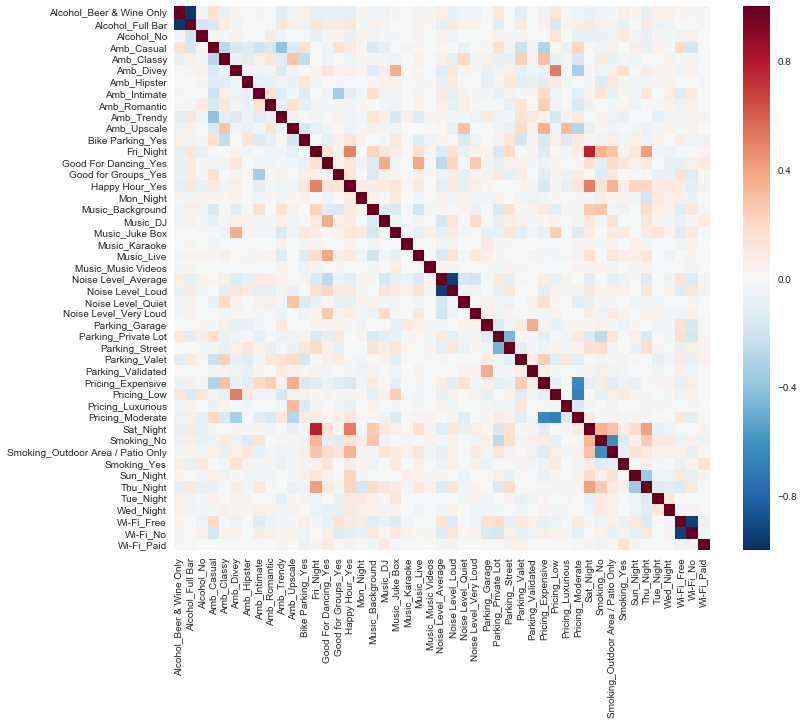

In [77]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# sns.set(font_scale=1.5)
# g = sns.PairGrid(df)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend()

In [220]:
from sklearn.preprocessing import scale

## Modeling

### Principal Components

In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
pca_2d = pca.transform(df)

In [205]:
pca_2d = pd.DataFrame(pca_2d)
pca_2d.index = df.index
pca_2d.columns = ['PC1','PC2']
#Cumulative Variance explained
np.cumsum(pca.explained_variance_ratio_)

array([ 0.45585983,  0.60655291])

### K-Means Clustering

In [169]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,6):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,
               max_iter=300,random_state=99)
    km.fit(df)
    distortions.append(km.inertia_)

<function matplotlib.pyplot.show>

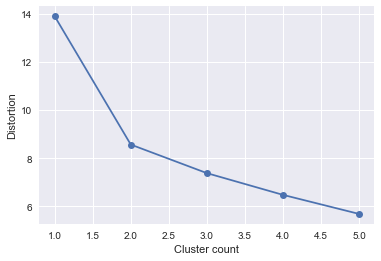

In [187]:
plt.plot(range(1,6),distortions,marker='o')
plt.xlabel('Cluster count')
plt.ylabel('Distortion')
plt.show

In [198]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,
               max_iter=300,random_state=99)
clusters = kmeans.fit(df)
pca_2d['cluster'] = pd.Series(clusters.labels_, index=pca_2d.index)

In [199]:
# from sklearn.metrics import silhouette_samples
# from matplotlib import cm
# cluster_labels = np.unique(pca_2d['cluster'])
# n_clusters = cluster_labels.shape[0]
# silhouette_vals = silhouette_samples(df,pca_2d['cluster'],metric='euclidean')

In [200]:
# y_ax_lower, y_ax_upper = 0,0
# yticks = []
# for i, c in enumerate(cluster_labels):
#     c_silhouette_vals = silhouette_vals[]

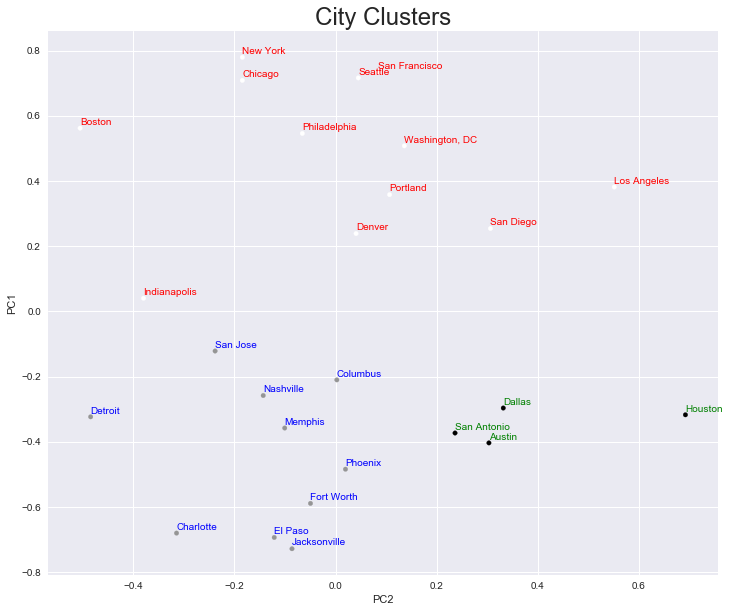

In [201]:
ax2 = pca_2d.plot(
    kind='scatter', x='PC2',y='PC1', c=pca_2d.cluster.astype(np.float), 
    figsize=(12,10))

plt.title('City Clusters', fontsize=24)

for i, city in pca_2d.iterrows():
    if city['cluster'] == 0: ax2.annotate(i, (city['PC2'], city['PC1']+.01),color='red')
    elif city['cluster'] == 1: ax2.annotate(i, (city['PC2'], city['PC1']+.01),color='blue')
    elif city['cluster'] == 2: ax2.annotate(i, (city['PC2'], city['PC1']+.01),color='green')